<h1> KNeighborsClassifier <h1>

Hauptkomponentenanalyse vor KNN?

In [350]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import chi2, SelectKBest, f_classif
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

In [351]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [352]:
def split_train_test(df):
    random_state = 4711
    features = [x for x in df.columns if x!= "RESP"]
    X = df[features]
    y = df["RESP"]
    X_train, X_test_2, y_train, y_test_2 = train_test_split(X, y, test_size = 0.05, random_state=random_state)
    X_train, X_test_1, y_train, y_test_1 = train_test_split(X_train, y_train, test_size = 0.2, random_state=random_state)
    return X_train, X_test_2, y_train, y_test_2, X_test_1, y_test_1

In [353]:
def get_result_score(y_test, y_predicted):

    TP = 0
    FP = 0
    TN = 0
    FN = 0

    y_true = y_test.to_list()
    y_predicted = y_predicted.tolist()

    for i in range(len(y_predicted)):
        if y_true[i]==y_predicted[i]==1:
            TP += 1
        if y_predicted[i]==1 and y_true[i]!=y_predicted[i]:
            FP += 1
        if y_true[i]==y_predicted[i]==0:
            TN += 1
        if y_predicted[i]==0 and y_true[i]!=y_predicted[i]:
            FN += 1


    return (TP*16+FP*(-2)+TN*(0)+FN*(-16))

In [354]:
path = r'./out/df_clean.csv'
df = pd.read_csv(path, sep=';', decimal=',')

In [355]:
df.head()

,ZIP_CODE,DAYS_SINCE_PURCHASE,PURCHASE_VISITS,TOTAL_NET_SALES,CC_CARD,AVE_AMOUNT_SPENT,AMSPEND,PSSPEND,CCSPEND,AXSPEND,...,CLUSTYPE_Cluster_46,CLUSTYPE_Cluster_47,CLUSTYPE_Cluster_48,CLUSTYPE_Cluster_49,CLUSTYPE_Cluster_5,CLUSTYPE_Cluster_50,CLUSTYPE_Cluster_6,CLUSTYPE_Cluster_7,CLUSTYPE_Cluster_8,CLUSTYPE_Cluster_9
0,1001,208,2,368.46,0,184.23,0.0,0.0,368.46,0.0,...,False,False,False,False,False,False,False,False,False,False
1,1028,6,4,258.00,1,64.50,0.0,0.0,258.00,0.0,...,False,False,False,False,False,False,False,False,False,False
2,1056,327,2,77.00,0,38.50,0.0,0.0,77.00,0.0,...,False,False,False,False,False,False,False,False,False,False
3,1118,66,8,846.06,1,105.75,0.0,0.0,846.06,0.0,...,False,False,False,False,False,False,False,False,False,False
4,1107,49,1,87.44,0,87.44,0.0,0.0,87.44,0.0,...,False,False,False,False,False,False,False,False,False,False


In [356]:
X_train, X_test_2, y_train, y_test_2, X_test_1, y_test_1 = split_train_test(df)

In [357]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16522 entries, 10016 to 3273
Data columns (total 82 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ZIP_CODE             16522 non-null  int64  
 1   DAYS_SINCE_PURCHASE  16522 non-null  int64  
 2   PURCHASE_VISITS      16522 non-null  int64  
 3   TOTAL_NET_SALES      16522 non-null  float64
 4   CC_CARD              16522 non-null  int64  
 5   AVE_AMOUNT_SPENT     16522 non-null  float64
 6   AMSPEND              16522 non-null  float64
 7   PSSPEND              16522 non-null  float64
 8   CCSPEND              16522 non-null  float64
 9   AXSPEND              16522 non-null  float64
 10  TMONSPEND            16522 non-null  float64
 11  OMONSPEND            16522 non-null  float64
 12  SMONSPEND            16522 non-null  float64
 13  PREVPD               16522 non-null  float64
 14  GMP                  16522 non-null  float64
 15  PROMOS               16522 non-nu

In [358]:
X_train.head()

,ZIP_CODE,DAYS_SINCE_PURCHASE,PURCHASE_VISITS,TOTAL_NET_SALES,CC_CARD,AVE_AMOUNT_SPENT,AMSPEND,PSSPEND,CCSPEND,AXSPEND,...,CLUSTYPE_Cluster_46,CLUSTYPE_Cluster_47,CLUSTYPE_Cluster_48,CLUSTYPE_Cluster_49,CLUSTYPE_Cluster_5,CLUSTYPE_Cluster_50,CLUSTYPE_Cluster_6,CLUSTYPE_Cluster_7,CLUSTYPE_Cluster_8,CLUSTYPE_Cluster_9
10016,8215,331,1,108.00,0,108.00,0.0,49.00,59.00,0.0,...,False,False,False,False,False,False,False,False,False,False
8232,40207,27,1,255.60,1,255.60,0.0,0.00,255.60,0.0,...,False,False,False,False,False,False,False,False,False,False
17428,47724,47,8,431.24,0,53.90,0.0,391.95,39.29,0.0,...,False,False,False,False,False,True,False,False,False,False
16268,67428,153,3,299.00,1,99.66,0.0,138.00,161.00,0.0,...,False,False,False,False,False,False,False,False,False,False
18733,77070,6,1,72.98,0,72.98,0.0,64.98,8.00,0.0,...,False,False,False,False,False,False,False,False,False,False


### Scaling on z-values
### Auf Pipeline achten! Skalierung innerhalb der Pipeline durchführen

In [359]:
"""skBest_chi = SelectKBest(chi2, k=10)
Da negatice Werte im Datensatz enthalten sind: classif wählen statt pearsons chi quadrat Test https://stackoverflow.com/questions/25792012/feature-selection-using-scikit-learn"""
skBest_classif = SelectKBest(f_classif, k=10)
std_slc = preprocessing.StandardScaler()
knn = KNeighborsClassifier()

In [360]:
step_order = [("scaler",std_slc),("skBest_chi",skBest_classif),("knn",knn)]
pipe = Pipeline(step_order)

In [361]:
mean_acc = np.zeros(30)
mean_score = np.zeros(30)
for i in range(1,31):
    pipe.set_params(knn__n_neighbors=i).fit(X_train, y_train)
    pipe.fit(X_train, y_train)
    y_predicted = pipe.predict(X_test_1)
    mean_acc[i-1] = metrics.accuracy_score(y_test_1, y_predicted)
    mean_score[i-1] = get_result_score(y_test_1, y_predicted)


[0.77680949 0.82110869 0.80948923 0.82667635 0.81893004 0.83418059
 0.83272815 0.83781167 0.83732752 0.84120068 0.84386347 0.84337933
 0.84410554 0.84555798 0.84386347 0.84458969 0.8453159  0.84580005
 0.84604212 0.84458969 0.8436214  0.84483176 0.84410554 0.84313725
 0.84458969 0.84410554 0.84652626 0.84555798 0.84628419 0.84555798]
[-4700. -8594. -5990. -8218. -6572. -7706. -6488. -7796. -6750. -7588.
 -6426. -7360. -6634. -7312. -6936. -7380. -6894. -7400. -6888. -7530.
 -7148. -7408. -7054. -7452. -7080. -7414. -6914. -7372. -7096. -7522.]


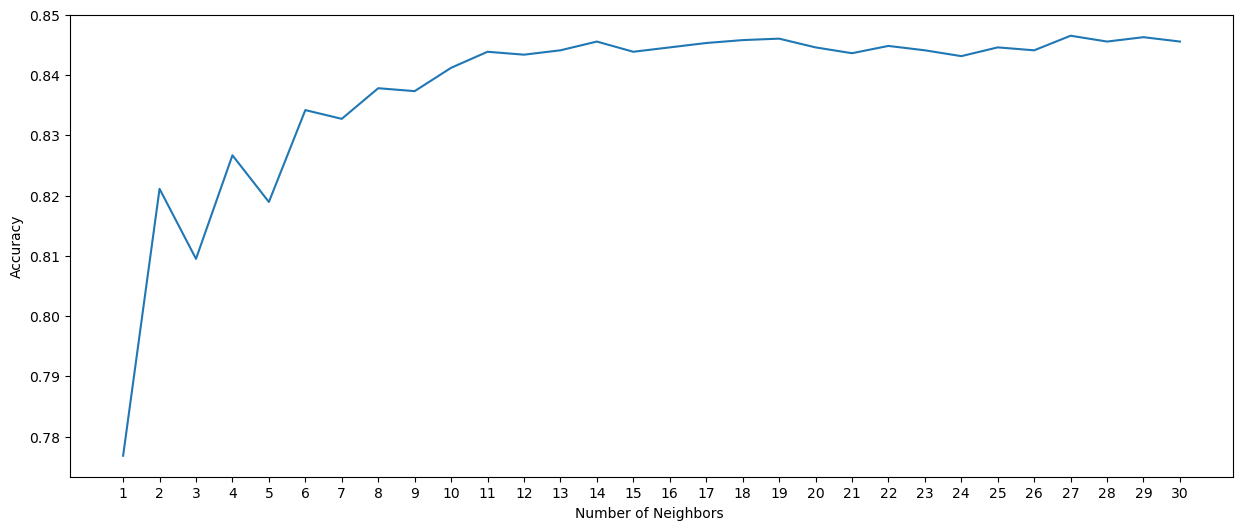

In [362]:
print(mean_acc)
print(mean_score)
loc = np.arange(1,31,step=1.0)
plt.figure(figsize = (15, 6))
plt.plot(range(1,31), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

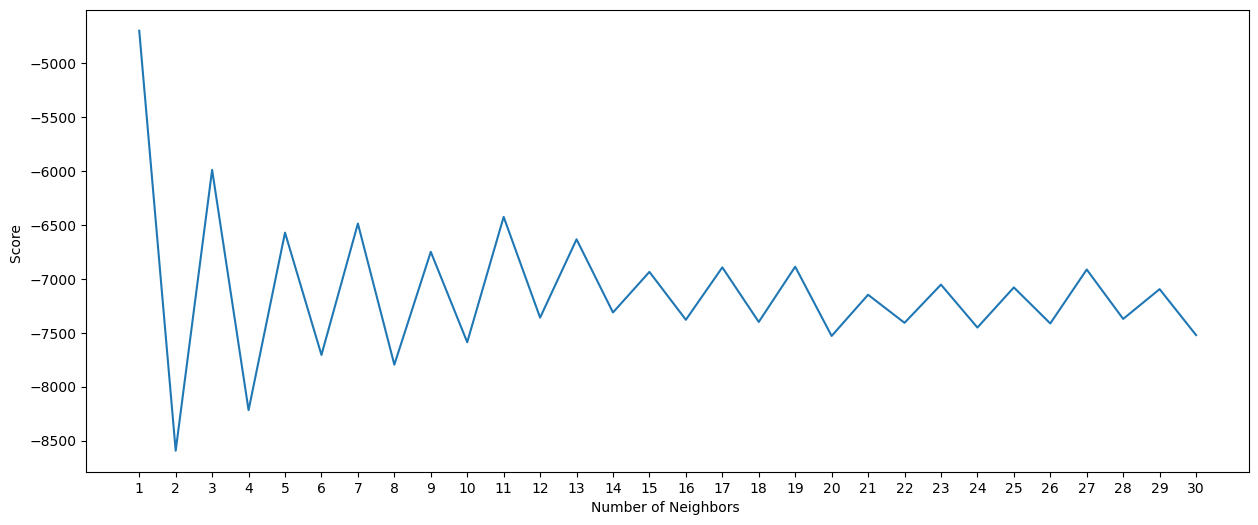

In [363]:
loc = np.arange(1, 31, step=1.0)
plt.figure(figsize=(15, 6))
plt.plot(range(1, 31), mean_score)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Score ')
plt.show()

In [364]:
grid_params = {"knn__n_neighbors" : [2,5,7,9,12,15,20],
              "knn__weights" : ["uniform","distance"],
              "knn__metric": ["euclidean","minkowski"]
              }
result_scorer = make_scorer(get_result_score)
knn_random_result_score = GridSearchCV(estimator = pipe, param_grid = grid_params,
                                       cv = 3, n_jobs = -1, scoring = result_scorer, error_score="raise")
knn_random_result_accuracy = GridSearchCV(estimator=pipe,param_grid = grid_params, cv = 3, n_jobs = -1,error_score="raise")
knn_random_result_recall = GridSearchCV(estimator = pipe, param_grid = grid_params,
                                        cv = 3, n_jobs = -1, scoring = "recall", error_score="raise")

In [365]:
knn_random_result_score_res = knn_random_result_score.fit(X_train, y_train)
knn_random_result_accuracy_res = knn_random_result_accuracy.fit(X_train, y_train)
knn_random_result_recall_res = knn_random_result_recall.fit(X_train, y_train)
print("Bester Score: ",knn_random_result_score_res.best_score_)
print("Mit Parametern: ",knn_random_result_score_res.best_params_)
print("Beste Accuracy: ",knn_random_result_accuracy_res.best_score_)
print("Mit Parametern: ",knn_random_result_accuracy_res.best_params_)
print("Bester Recall: ",knn_random_result_recall_res.best_score_)
print("Mit Parametern: ",knn_random_result_recall_res.best_params_)

Bester Score:  -5992.666666666667
Mit Parametern:  {'knn__metric': 'euclidean', 'knn__n_neighbors': 2, 'knn__weights': 'distance'}
Beste Accuracy:  0.8466287729483354
Mit Parametern:  {'knn__metric': 'euclidean', 'knn__n_neighbors': 20, 'knn__weights': 'distance'}
Bester Recall:  0.3337000366703337
Mit Parametern:  {'knn__metric': 'euclidean', 'knn__n_neighbors': 2, 'knn__weights': 'distance'}


Accuracy:  73.13707451701931 %
Recall:  48.8235294117647 %
Precision:  28.819444444444443 %
F1 Score:  36.244541484716144 %
Score:  -474


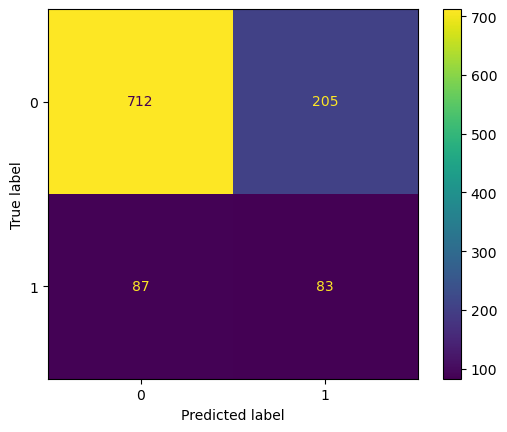

In [366]:
pipe.set_params(knn__n_neighbors=2, knn__weights="uniform").fit(X_train, y_train)
y_predicted = (pipe.predict_proba(X_test_2)[:,1]>=0.1).astype(bool)

accuracy = accuracy_score(y_test_2, y_predicted)
precision = precision_score(y_test_2, y_predicted)
recall = recall_score(y_test_2, y_predicted)
f1score = f1_score(y_test_2, y_predicted)
score = get_result_score(y_test_2, y_predicted)

print("Accuracy: ",accuracy*100, "%")
print("Recall: ", recall*100, "%")
print("Precision: ", precision*100, "%")
print("F1 Score: ", f1score*100, "%")
print("Score: ", score)
matrix = confusion_matrix(y_test_2,y_predicted,labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=knn.classes_)
disp.plot()
plt.grid(False)
plt.show()

Accuracy:  57.31370745170194 %
Recall:  87.6470588235294 %
Precision:  25.16891891891892 %
F1 Score:  39.10761154855643 %
Score:  1162


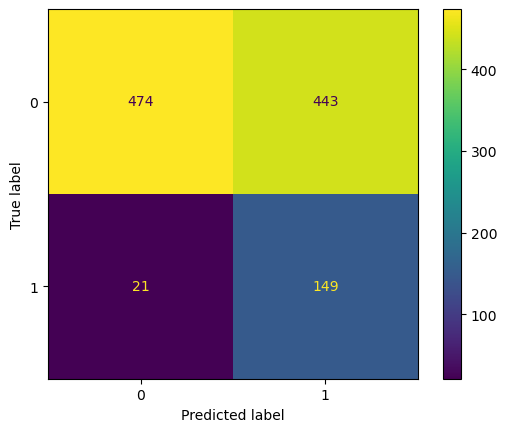

In [367]:
pipe.set_params(knn__n_neighbors=17, knn__weights="uniform").fit(X_train, y_train)
y_predicted = (pipe.predict_proba(X_test_2)[:,1]>=0.1).astype(bool)

accuracy = accuracy_score(y_test_2, y_predicted)
precision = precision_score(y_test_2, y_predicted)
recall = recall_score(y_test_2, y_predicted)
f1score = f1_score(y_test_2, y_predicted)
score = get_result_score(y_test_2, y_predicted)

print("Accuracy: ",accuracy*100, "%")
print("Recall: ", recall*100, "%")
print("Precision: ", precision*100, "%")
print("F1 Score: ", f1score*100, "%")
print("Score: ", score)
matrix = confusion_matrix(y_test_2,y_predicted,labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=knn.classes_)
disp.plot()
plt.grid(False)
plt.show()

<h2>Baseline Strategie<h2>

In [368]:
len(y_test_2)
count_RESP_yes = sum(y_test_2)
count_RESP_no = len(y_test_2) - sum(y_test_2)
baseline = (count_RESP_yes*16)+(count_RESP_no*(-2))
print(baseline)

886
